# Homework 6
## Joseph Hickey
### 3/4/2020
### A function which loops through all the snapshots of a galaxy to find it's COM

In [1]:
#Import libraries and files that are used

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from ReadFile import Read
from CenterOfMass import CenterOfMass

In [2]:
#Function grenerates a file with 6D information on target galaxy at each time step

def OrbitCOM(galaxy,start=0,end=800,n=5):
    #galaxy is a string signifying the target galaxy
    #start is the first snapshot to be read
    #end is the final snapshot to be read
    #n is the number of snapshots to be skipped between reads
    
    #Name of the file data is written to    
    fileout = 'Orbit_' + galaxy + '.txt'
    
    #Constants for the CenterOfMass class COM_P function
    delta = 0.1
    VolDec = 4.
    
    #Array with a length equal to the number of snapshots that will be read
    snap_ids = np.arange(start,end,n)
    #Array to store data
    orbit = np.zeros([len(snap_ids),7])
    
    #loop over the snapshots that will be read and store the data in the orbit array
    for i, snap_id in enumerate(snap_ids):
        
        #Construct filename, snapshots must be stored in a child directory
        filename = './Snapshots/' + galaxy + '_' + str(snap_id).zfill(3) + '.txt'
        
        #Call COM class
        gal = CenterOfMass(filename,2)
        #Assign data to positions in array
        orbit[i,0] = gal.time.value/1000.
        orbit[i,1:4] = (gal.COM_P(delta,VolDec)).value
        orbit[i,4:] = (gal.COM_V(orbit[i,1],orbit[i,2],orbit[i,3])).value
        #Print progress
        print(str(i+1) + '/' + str(int((end-start)/n)))
        
    #Save array with header to text
    np.savetxt(fileout,orbit,header='t x y z vx vy vz',comments='#',fmt=['%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f'])
    print('Finished saving file: ' + fileout)
    
    

In [3]:
#Read and output data for all three galaxies
OrbitCOM('MW')
OrbitCOM('M31')
OrbitCOM('M33')

FileNotFoundError: [Errno 2] No such file or directory: './Snapshots/MW_000.txt'

In [3]:
#Function subtracts vectors component-wise and returns the magnitude
def VectorDiff(vec1,vec2):
    dif = np.asarray(vec1) - np.asarray(vec2)
    mag = np.sqrt(dif[0]**2 + dif[1]**2 + dif[2]**2)
    return mag

In [4]:
#Read in the data arrays for each galaxy
MW = np.genfromtxt('Orbit_MW.txt',comments='#',names=True)
M31 = np.genfromtxt('Orbit_M31.txt',comments='#',names=True)
M33 = np.genfromtxt('Orbit_M33.txt',comments='#',names=True)

In [5]:
#Use VectorDiff function to get relative distances and velocities of galaxies
mwm31dist = VectorDiff([MW['x'],MW['y'],MW['z']],[M31['x'],M31['y'],M31['z']])
mwm31vel = VectorDiff([MW['vx'],MW['vy'],MW['vz']],[M31['vx'],M31['vy'],M31['vz']])

m33m31dist = VectorDiff([M33['x'],M33['y'],M33['z']],[M31['x'],M31['y'],M31['z']])
m33m31vel = VectorDiff([M33['vx'],M33['vy'],M33['vz']],[M31['vx'],M31['vy'],M31['vz']])


Text(0.5,1,'Distance between MW and M31 over time')

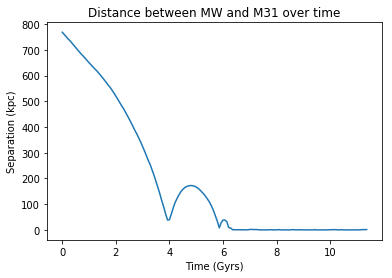

In [6]:
#Plot distance as a function of time
plt.plot(MW['t'],mwm31dist)
plt.xlabel('Time (Gyrs)')
plt.ylabel('Separation (kpc)')
plt.title('Distance between MW and M31 over time')

Text(0.5,1,'Distance between M33 and M31 over time')

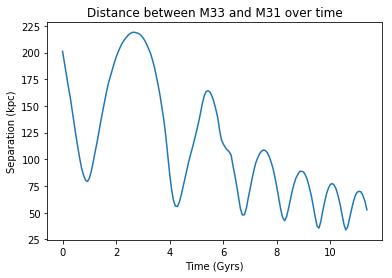

In [7]:
#Plot distance as a function of time
plt.plot(M33['t'],m33m31dist)
plt.xlabel('Time (Gyrs)')
plt.ylabel('Separation (kpc)')
plt.title('Distance between M33 and M31 over time')

Text(0.5,1,'Relative velocity of MW and M31 over time')

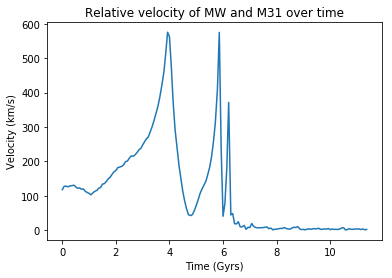

In [8]:
#Plot relative velocity as a function of time
plt.plot(MW['t'],mwm31vel)
plt.xlabel('Time (Gyrs)')
plt.ylabel('Velocity (km/s)')
plt.title('Relative velocity of MW and M31 over time')

Text(0.5,1,'Relative velocity of M33 and M31 over time')

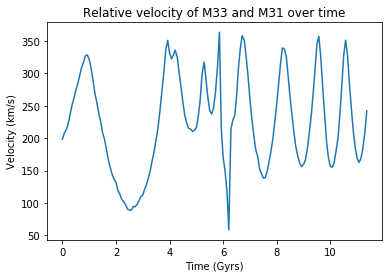

In [9]:
#Plot relative velocity as a function of time
plt.plot(M33['t'],m33m31vel)
plt.xlabel('Time (Gyrs)')
plt.ylabel('Velocity (km/s)')
plt.title('Relative velocity of M33 and M31 over time')

## Question 1:  
  
The Milky Way and Andromeda galaxies will have 6 close encounters over the 12 Gyr period

## Question 2:
  
Relative velocity is inversely related to separation since the potential energy of the galaxies decreases and kinetic energy increases as the separation decreases.

## Question 3:
  
The Milky Way and Andromeda galaxies merge after about 6 Gyrs at which point, M33 is dragged into the now greater potential well of the merger product.

## Question 4:
  
The decay rate is about 40 kpc / Gyr.  
At this rate, M33 will merge with the Milky Way-Andromeda remnant within 2 Gyr.